# 3. Cities in Sweden - gender (*)
We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames.  
In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

In [2]:
import pandas as pd
import seaborn as sns

file_path = "../Data/komtopp50_2020.xlsx"
sheet_names = ["Kvinnor", "Män"]

df_dict = pd.read_excel(file_path, sheet_name = sheet_names, skiprows = 6) # or header
df_dict["Män"].head(7)

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,81,83,Ale,16256,16054,1.258253
1,64,64,Alingsås,20702,20646,0.271239
2,122,123,Alvesta,10367,10339,0.270819
3,255,255,Aneby,3503,3498,0.142939
4,169,168,Arboga,7094,7114,-0.281136
5,287,286,Arjeplog,1426,1458,-2.194787
6,262,262,Arvidsjaur,3168,3182,-0.439975


---
## a) 
Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


In [3]:
df_dict["Kvinnor"].head(1)

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,84,85,Ale,15612,15348,1.720094


In [4]:
for sheet_name in df_dict:  # updating missing column name of all DataFrames in dict:
    df_dict[sheet_name].rename(
        columns={
            2020: "Rang 2020",
            2019: "Rang 2019", 
            "Unnamed: 2": "Kommun",
            "2020.1": "Folkmängd 2020",
            "2019.1": "Folkmängd 2019",
            "%": "Förändring",
        },
        inplace=True,
    )
    df_dict[sheet_name]["Kön"] = sheet_name

df_dict["Kvinnor"].head(1)


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinnor


In [5]:
# %%timeit
# name_list = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring (%)"]
# for key, value in df_dict.items():
#     for i, n in enumerate(value.columns):
#         value.rename(columns={n: name_list[i]}, inplace = True)
#     value["Kön"] = key
# df_dict["Kvinnor"].head(1)

---
## b) 
Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

In [6]:
df = pd.concat([df_dict["Kvinnor"], df_dict["Män"]]).drop(["Rang 2020", "Rang 2019"], axis = "columns")
df.head(1)

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,15612,15348,1.720094,Kvinnor


---
## c) 
Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

In [7]:
df_total.head(1)

NameError: name 'df_total' is not defined

In [ ]:
df_total = df_total.rename(columns = {"Folkmängd 2020": "Total Pop 2020", "Folkmängd 2019": "Total Pop 2019", "Förändring": "Total Förändring"}).drop(["Rang2020", "Rang 2019"], axis = "columns")
df_total.head(5)

,Kommun,Total Pop 2020,Total Pop 2019,Total Förändring
198,Stockholm,975551,974073.0,0.151734
57,Göteborg,583056,579281.0,0.65167
134,Malmö,347949,344166.0,1.099179
241,Uppsala,233839,230767.0,1.331213
124,Linköping,164616,163051.0,0.959822


---
## d) 
Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

In [ ]:
df = df.merge(df_total).sort_values(by = "Total Pop 2020", ascending = False, ignore_index = True)
df.head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring
0,Stockholm,492569,491853,0.145572,Kvinnor,975551,974073.0,0.151734
1,Stockholm,482982,482220,0.158019,Män,975551,974073.0,0.151734
2,Göteborg,292505,290308,0.756782,Män,583056,579281.0,0.65167
3,Göteborg,290551,288973,0.546072,Kvinnor,583056,579281.0,0.65167
4,Malmö,172538,170623,1.122357,Män,347949,344166.0,1.099179


---
## e) 
Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities

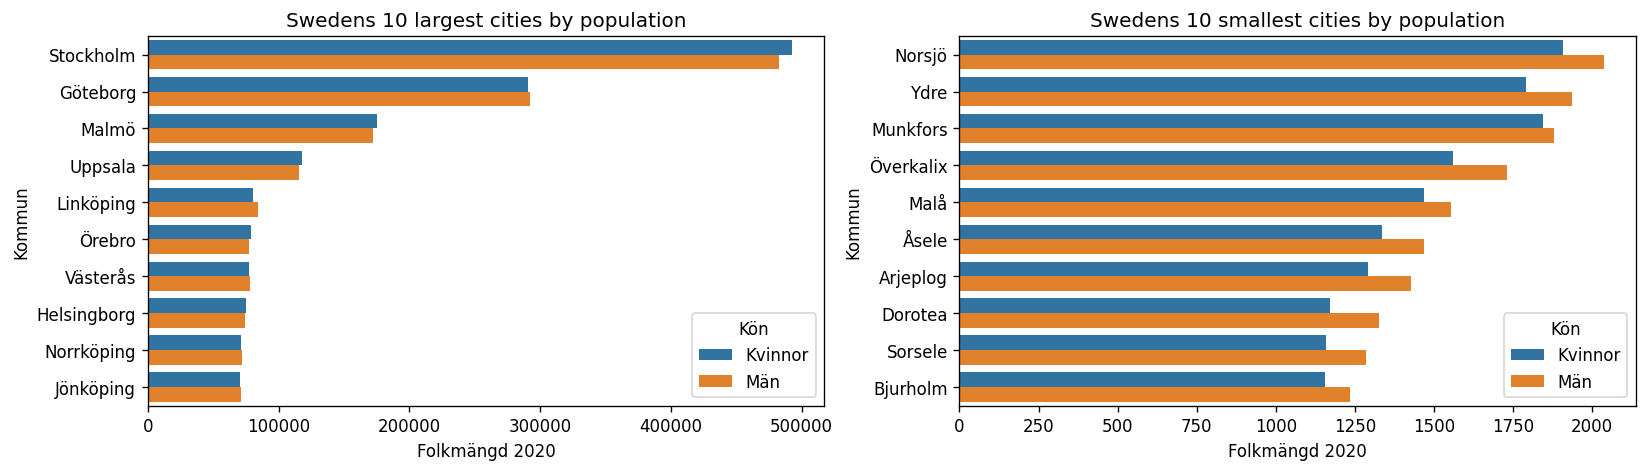

In [ ]:
data = [df.head(20), df.tail(20)]
titles = ["Swedens 10 largest cities by population", "Swedens 10 smallest cities by population"]
fig, ax = plt.subplots(1,2, figsize = (16, 4), dpi = 120)

for i, (datapoint, title) in enumerate(zip(data, titles)):
    sns.barplot(data = datapoint, x = "Folkmängd 2020", y = "Kommun", hue = "Kön", ax = ax[i])
    ax[i].set(title = title)